In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_df = pd.read_csv("Data/House_prediction_krish/test.csv")

In [3]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
#Checking for null values

In [5]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [6]:
test_df["MSZoning"].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [7]:
## Fill Missing Values
test_df["LotFrontage"] = test_df["LotFrontage"].fillna(test_df["LotFrontage"].mean())

In [8]:
test_df["MSZoning"] = test_df["MSZoning"].fillna(test_df["MSZoning"].mode()[0])

In [20]:
test_df.isnull().sum().sort_values(ascending=False)

BsmtHalfBath     2
Functional       2
BsmtFullBath     2
Utilities        2
BsmtFinSF1       1
                ..
BsmtFinType1     0
BsmtFinType2     0
MSSubClass       0
Heating          0
SaleCondition    0
Length: 75, dtype: int64

In [14]:
test_df["GarageFinish"] = test_df["GarageFinish"].fillna(test_df["GarageFinish"].mode()[0])
test_df["GarageQual"] = test_df["GarageQual"].fillna(test_df["GarageQual"].mode()[0])
test_df["GarageCond"] = test_df["GarageCond"].fillna(test_df["GarageCond"].mode()[0])

test_df["BsmtFinType1"] = test_df["BsmtFinType1"].fillna(test_df["BsmtFinType1"].mode()[0])
test_df["BsmtExposure"] = test_df["BsmtExposure"].fillna(test_df["BsmtExposure"].mode()[0])
test_df["BsmtFinType2"] = test_df["BsmtFinType2"].fillna(test_df["BsmtFinType2"].mode()[0])

test_df["FireplaceQu"] = test_df["FireplaceQu"].fillna(test_df["FireplaceQu"].mode()[0])
test_df["GarageType"] = test_df["GarageType"].fillna(test_df["GarageType"].mode()[0])

test_df.drop(["GarageYrBlt"], axis=1, inplace=True)

test_df["BsmtCond"] = test_df["BsmtCond"].fillna(test_df["BsmtCond"].mode()[0])#For categorical feature I am replacing them with the mode.
test_df["BsmtQual"] = test_df["BsmtQual"].fillna(test_df["BsmtQual"].mode()[0])
test_df["MasVnrType"] = test_df["MasVnrType"].fillna(test_df["MasVnrType"].mode()[0])
test_df["MasVnrArea"] = test_df["MasVnrArea"].fillna(test_df["MasVnrArea"].mode()[0])

test_df["LotFrontage"] = test_df["LotFrontage"].fillna(test_df["LotFrontage"].mean())
test_df.drop(["Alley"], axis=1, inplace=True)

In [18]:
test_df.drop(["PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

In [23]:
test_df.isnull().sum().sort_values(ascending=False)

Id               0
FireplaceQu      0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
Length: 75, dtype: int64

In [22]:
test_df.dropna(axis = 0, inplace=True)

<AxesSubplot:>

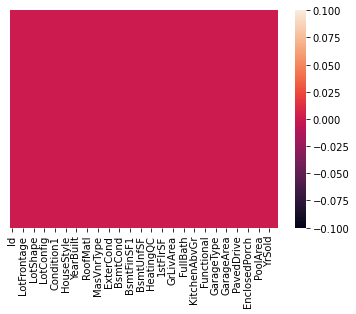

In [25]:
sns.heatmap(test_df.isnull(), yticklabels = False)

In [26]:
test_df.shape

(1449, 75)

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1449 non-null   int64  
 1   MSSubClass     1449 non-null   int64  
 2   MSZoning       1449 non-null   object 
 3   LotFrontage    1449 non-null   float64
 4   LotArea        1449 non-null   int64  
 5   Street         1449 non-null   object 
 6   LotShape       1449 non-null   object 
 7   LandContour    1449 non-null   object 
 8   Utilities      1449 non-null   object 
 9   LotConfig      1449 non-null   object 
 10  LandSlope      1449 non-null   object 
 11  Neighborhood   1449 non-null   object 
 12  Condition1     1449 non-null   object 
 13  Condition2     1449 non-null   object 
 14  BldgType       1449 non-null   object 
 15  HouseStyle     1449 non-null   object 
 16  OverallQual    1449 non-null   int64  
 17  OverallCond    1449 non-null   int64  
 18  YearBuil

In [29]:
test_df.to_csv("formulatedtest.csv", index=False)